In [47]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [39]:
df=pd.read_csv('/Users/apple/Desktop/Data science/UpGrad ML/Clustering/Cricket.csv',sep=',',encoding='ISO-8859-1',header=0)
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [40]:
df1=df[['Player','SR','Ave']]
df1.head()

,Player,SR,Ave
0,SR Tendulkar (INDIA),86.23,44.83
1,KC Sangakkara (Asia/ICC/SL),78.86,41.98
2,RT Ponting (AUS/ICC),80.39,42.03
3,ST Jayasuriya (Asia/SL),91.20,32.36
4,DPMD Jayawardene (Asia/SL),78.96,33.37


In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 3 columns):
Player    79 non-null object
SR        79 non-null float64
Ave       79 non-null float64
dtypes: float64(2), object(1)
memory usage: 1.9+ KB


In [42]:
std= StandardScaler()
df_scaled=std.fit_transform(df1[['SR','Ave']])

In [43]:
df_scaled
df_scaled=pd.DataFrame(df_scaled)
df_scaled.columns=['SR','Ave']
df_scaled.head()

,SR,Ave
0,0.703152,1.072294
1,-0.044139,0.587725
2,0.110997,0.596226
3,1.207091,-1.047909
4,-0.034000,-0.876185


In [44]:
n_cluster=[1,2,3,4,5,6,7,8]
ssd=[]
for num in n_cluster:
    kmeans=KMeans(n_clusters=num,max_iter=50)
    kmeans.fit(df_scaled)
    
    ssd.append(kmeans.inertia_)
ssd    

[157.99999999999997,
 102.22538186893445,
 70.9097802919371,
 50.373334766895816,
 38.58620821713295,
 31.123760299778887,
 24.821272895425196,
 20.573194043872093]

In [45]:
ssd_df=pd.DataFrame(ssd)
ssd_df.columns=['SSD']
ssd_df['n_cluster']=n_cluster
ssd_df

,SSD,n_cluster
0,158.000000,1
1,102.225382,2
2,70.909780,3
3,50.373335,4
4,38.586208,5
5,31.123760,6
6,24.821273,7
7,20.573194,8


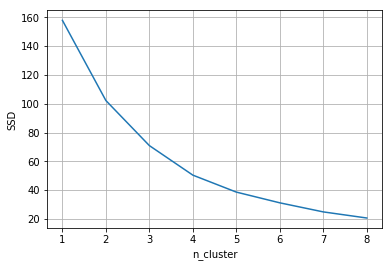

In [46]:
sns.lineplot(x='n_cluster',y='SSD',data=ssd_df)
plt.grid()

In [60]:
kmeans= KMeans(n_clusters=4, max_iter=50)
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [61]:
kmeans.labels_

array([3, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 2, 3, 1, 3, 1, 2, 0, 0, 2, 0,
       1, 0, 2, 3, 2, 2, 1, 0, 1, 1, 0, 1, 3, 1, 1, 0, 3, 0, 1, 1, 3, 1,
       1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 0, 3, 3, 0,
       0, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 2, 1], dtype=int32)

In [62]:
df1['C_Label']=kmeans.labels_

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [63]:

df1

,Player,SR,Ave,C_Label
0,SR Tendulkar (INDIA),86.23,44.83,3
1,KC Sangakkara (Asia/ICC/SL),78.86,41.98,0
2,RT Ponting (AUS/ICC),80.39,42.03,0
3,ST Jayasuriya (Asia/SL),91.20,32.36,2
4,DPMD Jayawardene (Asia/SL),78.96,33.37,1
5,Inzamam-ul-Haq (Asia/PAK),74.24,39.52,0
6,JH Kallis (Afr/ICC/SA),72.89,44.36,0
7,SC Ganguly (Asia/INDIA),73.70,41.02,0
8,R Dravid (Asia/ICC/INDIA),71.24,39.16,0
9,BC Lara (ICC/WI),79.51,40.48,0
